# Capital One: Model Building on a Synthetic Dataset

**Leng Yang**

**Last Updated: 2/11/25**

## Assignment

Project Source: https://platform.stratascratch.com/data-projects/model-building-synthetic-dataset

The two synthetic datasets were generated using the same underlying data model. Your goal is to build a predictive model using the data in the training dataset to predict the withheld target values from the test set.

You may use any tools available to you for this task. Ultimately, we will assess predictive accuracy on the test set using the mean squared error metric. You should produce the following:

* A 1,000 x 1 text file containing 1 prediction per line for each record in the test dataset.
* A brief writeup describing the techniques you used to generate the predictions. Details such as important features and your estimates of predictive performance are helpful here, though not strictly necessary.
* (Optional) An implementable version of your model. What this would look like largely depends on the methods you used, but could include things like source code, a pickled Python object, a PMML file, etc. Please do not include any compiled executables.

## Data Description

We have provided two tab-delimited files along with these instructions:

* `codetest_train.txt`: 5,000 records x 254 features + 1 target
* `codetest_test.txt` : 1,000 records x 254 features

<BR><BR>

### Data Exploration

In [161]:
#Load in necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [114]:
#Load in data
df_train = pd.read_csv('./datasets/codetest_train.txt', sep='\t')
df_test = pd.read_csv('./datasets/codetest_test.txt', sep='\t')

In [116]:
#Train Dataframe Preview
df_train.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [118]:
#Test Dataframe Preview
df_test.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,1.122,2.372,-1.303,-0.421,-1.724,0.206,0.449,1.305,-0.344,0.307,...,0.988,-0.472,0.522,-0.308,1.062,-0.839,0.819,0.342,-0.162,-1.123
1,0.645,-0.818,-1.193,0.286,0.946,2.001,-1.491,-0.162,-1.668,0.310,...,-0.020,0.764,-0.623,0.147,0.392,0.509,1.608,-0.321,-1.723,1.223
2,-0.661,0.373,1.160,0.448,NaN,-0.378,-0.645,0.713,1.900,0.627,...,0.156,-0.267,0.140,-0.908,0.093,0.227,-0.996,-0.665,0.444,-1.452
3,0.837,1.270,-1.421,-0.483,1.136,0.051,-0.097,NaN,-1.524,-0.253,...,1.653,1.951,0.657,-1.238,-0.487,-1.341,1.221,1.938,-0.447,0.411
4,-0.001,-0.050,0.442,0.230,0.525,0.326,-0.590,-0.287,-0.556,-0.088,...,-0.291,-0.196,-0.738,-0.377,-0.660,1.776,-1.028,-0.797,0.185,0.378


In [94]:
#Check for categorical variables
df_train.select_dtypes(exclude='number')

,f_61,f_121,f_215,f_237
0,b,D,red,Canada
1,a,A,blue,Canada
2,b,B,orange,Canada
3,a,C,blue,USA
4,b,E,orange,Canada
...,...,...,...,...
4995,e,B,blue,Canada
4996,c,F,red,Canada
4997,d,F,yellow,Mexico
4998,d,C,blue,USA


In [96]:
#Check for categorical variables
df_test.select_dtypes(exclude='number')

,f_61,f_121,f_215,f_237
0,e,A,yellow,Mexico
1,d,B,red,Canada
2,d,C,NaN,Mexico
3,e,E,blue,USA
4,b,C,NaN,Mexico
...,...,...,...,...
995,b,B,yellow,USA
996,b,B,yellow,Mexico
997,e,D,red,Canada
998,c,B,red,Mexico


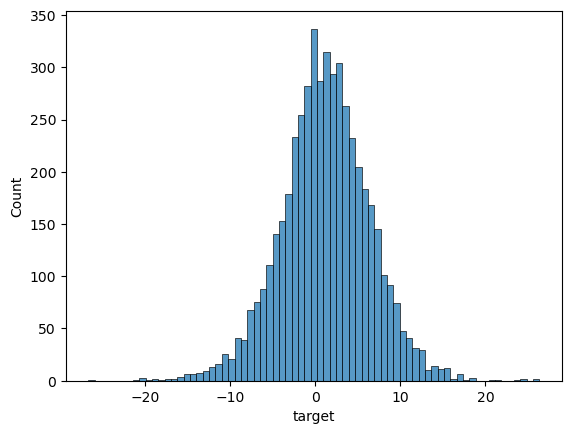

In [98]:
sns.histplot(df_train.target);

**Missing Values**

In [104]:
#Check for missing values in the training dataset
df_train.isna().sum()

target    0
f_0       0
f_1       0
f_2       0
f_3       0
         ..
f_249     0
f_250     0
f_251     0
f_252     0
f_253     0
Length: 255, dtype: int64

In [120]:
#Impute missing values with the mode for categorical features
for col in df_train.select_dtypes(exclude='number').columns:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

#Impute missing values with the mean for each numeric feature
for col in df_train.select_dtypes(include='number').columns:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

In [124]:
#Check for missing values in the testing dataset
df_test.isna().sum()

f_0      28
f_1      17
f_2      17
f_3      18
f_4      22
         ..
f_249    20
f_250    19
f_251    22
f_252    21
f_253    15
Length: 254, dtype: int64

In [126]:
#Impute missing values with the mode for categorical features
for col in df_test.select_dtypes(exclude='number').columns:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

#Impute missing values with the mean for each numeric feature
for col in df_test.select_dtypes(include='number').columns:
    df_test[col] = df_test[col].fillna(df_test[col].mean())

In [138]:
#Double Check there are no remaining missing values in each set
print(df_train.isna().sum().sum(), df_test.isna().sum().sum())

0 0


**Data Transformation**

In [146]:
#Encode categorical variables into numeric values
enc = LabelEncoder()

for col in df_train.select_dtypes(exclude='number').columns:
    df_train[col] = enc.fit_transform(df_train[col])

for col in df_test.select_dtypes(exclude='number').columns:
    df_test[col] = enc.fit_transform(df_test[col])

<BR>

### Modeling

In [163]:
#Splitting training set into train and validation sets
X = df_train.drop(columns='target')
y = df_train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Ridge Regression**

In [187]:
#Create list of alpha values to test
grid = {'alpha': np.logspace(-3, 3, 50)}

#Create pipeline to scale and then perform hyperparameter tuning
pipe = make_pipeline(StandardScaler(),
                     GridSearchCV(estimator=Ridge(random_state=1),
                                  param_grid=grid,
                                  scoring='neg_mean_squared_error'))

In [189]:
#Fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(estimator=Ridge(random_state=1),
                              param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02,...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
                              scoring='neg_mean_squared_error'))])

In [191]:
#Get info for the best model
pipe['gridsearchcv'].best_estimator_

Ridge(alpha=184.20699693267164, random_state=1)

In [201]:
print('Training MSE:', mean_squared_error(y_train, pipe.predict(X_train)))
print('Validation MSE:', mean_squared_error(y_test, pipe.predict(X_test)))

Training MSE: 12.062613051548306
Validation MSE: 13.43005098616572


**Lasso Regression**

In [204]:
#Create list of alpha values to test
grid = {'alpha': np.logspace(-3, 3, 50)}

#Create pipeline to scale and then perform hyperparameter tuning
pipe = make_pipeline(StandardScaler(),
                     GridSearchCV(estimator=Lasso(random_state=1),
                                  param_grid=grid,
                                  scoring='neg_mean_squared_error'))

In [206]:
#Fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(estimator=Lasso(random_state=1),
                              param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02,...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
                              scoring='neg_mean_squared_error'))])

In [224]:
#Get info for the best model
pipe['gridsearchcv'].best_estimator_

Lasso(alpha=0.09102981779915217, random_state=1)

In [210]:
print('Training MSE:', mean_squared_error(y_train, pipe.predict(X_train)))
print('Validation MSE:', mean_squared_error(y_test, pipe.predict(X_test)))

Training MSE: 12.677573301667827
Validation MSE: 12.534247923049035


In [230]:
print('Number of selected features in the best Lasso model:', len(X_train.columns[pipe['gridsearchcv'].best_estimator_.coef_ != 0]))
X_train.columns[pipe['gridsearchcv'].best_estimator_.coef_ != 0]

Number of selected features in the best Lasso model: 39


Index(['f_2', 'f_17', 'f_25', 'f_29', 'f_35', 'f_36', 'f_46', 'f_47', 'f_54',
       'f_61', 'f_63', 'f_64', 'f_67', 'f_71', 'f_83', 'f_86', 'f_92', 'f_94',
       'f_99', 'f_125', 'f_138', 'f_142', 'f_157', 'f_161', 'f_168', 'f_169',
       'f_175', 'f_181', 'f_193', 'f_195', 'f_205', 'f_212', 'f_214', 'f_218',
       'f_220', 'f_225', 'f_229', 'f_237', 'f_238'],
      dtype='object')

<BR>

### Test Set Predictions

In [257]:
#Predict on test set and concatenate results to the set
df_test = pd.concat([df_test, pd.Series(pipe.predict(df_test), name='prediction')], axis=1)

In [259]:
#Preview of test set with predictions
df_test.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,prediction
0,1.122,2.372,-1.303,-0.421,-1.724000,0.206,0.449,1.305000,-0.344,0.307,...,-0.472,0.522,-0.308,1.062,-0.839,0.819,0.342,-0.162,-1.123,5.779279
1,0.645,-0.818,-1.193,0.286,0.946000,2.001,-1.491,-0.162000,-1.668,0.310,...,0.764,-0.623,0.147,0.392,0.509,1.608,-0.321,-1.723,1.223,0.273826
2,-0.661,0.373,1.160,0.448,-0.042323,-0.378,-0.645,0.713000,1.900,0.627,...,-0.267,0.140,-0.908,0.093,0.227,-0.996,-0.665,0.444,-1.452,1.331794
3,0.837,1.270,-1.421,-0.483,1.136000,0.051,-0.097,0.025939,-1.524,-0.253,...,1.951,0.657,-1.238,-0.487,-1.341,1.221,1.938,-0.447,0.411,5.085789
4,-0.001,-0.050,0.442,0.230,0.525000,0.326,-0.590,-0.287000,-0.556,-0.088,...,-0.196,-0.738,-0.377,-0.660,1.776,-1.028,-0.797,0.185,0.378,7.046801


<BR>

### Limitations and Results

**Limitations**
* A lack of a data dictionary makes it difficult to understand the underlying data.

**Results**
* Missing values were imputed with the mean and mode, where apprpriate.
* Due to the sheer number of features, ridge and lasso regression models were employed. Hyperparameter tuning with cross-validation was employed to select for the best hyperparameters.
* The tuned `Lasso` model had a slight edge in results during model evaluation.
    * `Train MSE`: 12.68 | `Validation MSE`: 12.53
* The final, tuned Lasso model selected for only `39` out of the initial feature set of 254.